In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import transformers
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import ImageDraw, Image
import numpy as np

import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

/users/eleves-a/2022/sabrina.lomelino-sartori/few-shot-learning-transformers/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get and visualize data

In [3]:
dataset = load_dataset("katanaml/cord", )

#dataset = load_dataset("darentang/sroie")

Repo card metadata block was not found. Setting CardData to empty.


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 800
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 100
    })
    validation: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags', 'image_path'],
        num_rows: 100
    })
})

In [5]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'I-menu.cnt', 'I-menu.discountprice', 'I-menu.nm', 'I-menu.num', 'I-menu.price', 'I-menu.sub_cnt', 'I-menu.sub_nm', 'I-menu.sub_price', 'I-menu.unitprice', 'I-sub_total.discount_price', 'I-sub_total.etc', 'I-sub_total.service_price', 'I-sub_total.subtotal_price', 'I-sub_total.tax_price', 'I-total.cashprice', 'I-total.changeprice', 'I-total.creditcardprice', 'I-total.emoneyprice', 'I-total.menuqty_cnt', 'I-total.menutype_cnt', 'I-total.total_etc', 'I-total.total_price'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None)}

In [6]:
def unnormalize_bbox(bbox, width, height):
    return [
        int( (bbox[0] * width /1000)),
        int((bbox[1] * height /1000)),
        int((bbox[2] * width /1000)),
        int((bbox[3] * height / 1000)),
    ]

In [7]:
labels = dataset['train'][0]['ner_tags']

In [8]:
bboxes = dataset['train'][0]['bboxes']
img_pil = Image.open(dataset['train'][0]['image_path'])

In [14]:
np.unique(labels)

array([ 1,  3,  5, 11, 12, 13, 14, 22])

In [12]:
bboxes

[[296, 288, 312, 300],
 [298, 310, 312, 322],
 [298, 330, 314, 342],
 [300, 351, 317, 362],
 [298, 370, 317, 382],
 [300, 390, 319, 402],
 [303, 410, 321, 422],
 [307, 430, 324, 441],
 [305, 449, 324, 461],
 [310, 469, 326, 479],
 [307, 487, 326, 500],
 [310, 509, 328, 520],
 [307, 529, 326, 540],
 [310, 547, 326, 560],
 [307, 569, 324, 580],
 [307, 589, 324, 600],
 [303, 608, 321, 620],
 [303, 629, 321, 641],
 [300, 651, 319, 665],
 [300, 672, 319, 686],
 [300, 695, 319, 709],
 [300, 717, 319, 729],
 [268, 287, 282, 300],
 [349, 283, 409, 300],
 [421, 281, 508, 301],
 [516, 281, 577, 297],
 [627, 279, 715, 299],
 [270, 308, 284, 322],
 [351, 304, 398, 322],
 [407, 304, 497, 322],
 [504, 302, 564, 319],
 [618, 299, 715, 319],
 [270, 328, 284, 342],
 [350, 324, 482, 342],
 [490, 322, 578, 339],
 [629, 319, 717, 339],
 [273, 348, 287, 362],
 [354, 345, 402, 362],
 [409, 344, 483, 361],
 [493, 344, 539, 359],
 [629, 339, 715, 359],
 [275, 370, 289, 382],
 [354, 365, 414, 382],
 [423, 365,

In [9]:
color_labels = {
    0: "Red",
    1: "Yellow",
    2: "Green",
    3: "Blue",
    4: "Gray",
    5: "Pink",
    6: "Orange",
    7: "Black"
}

In [17]:
for idx, box in enumerate(bboxes):
    b = unnormalize_bbox(box, img_pil.width, img_pil.height)
    draw = ImageDraw.Draw(img_pil, 'RGB')
    draw.rectangle(b, outline='red')

new_img = img_pil.resize((300,600))

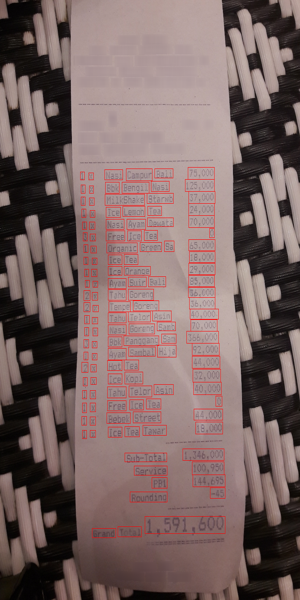

In [18]:
new_img